Manufacturing Credit - Exploratory Data Analysis
This notebook is used to explore the dataset for the manufacturing industry, to understand the data structure, distribution, and feature relationships.

1. Project Background
“Assembly-Line-Anomaly-Detection” usually refers to a system or model that identifies unusual patterns or abnormal behavior in an assembly line.
Objective: Use alternative data to predict a machine's ability. Evaluation Metric: AUC (Area Under the ROC Curve)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sys
sys.path.append('../')

from src.data.data_loader import IntelligentManufacturingDataLoader, reduce_memory_usage


In [2]:
from src.utils.visualization import DataVisualizer, plot_missing_values, plot_data_overview

## 2. Data loading

In [3]:
# data loader instance
data_loader = IntelligentManufacturingDataLoader(data_path='../data/raw')

# load all data
print("Loading datasets...")
datasets = data_loader.load_all_data()

# display basic info of each dataset
data_loader.get_data_info()

Loading datasets...
Loading all data...
Loading manufacturing data...
 check train shape : (80000, 13)
 check test shape : (20000, 13)
len of datasets : 2 datasets loaded.

=== Dataset Information ===

manufacturing_train:
  Shape: (80000, 14)
  Memory Usage: 22.56 MB
  Missing Values: 0

manufacturing_test:
  Shape: (20000, 14)
  Memory Usage: 5.64 MB
  Missing Values: 0


## 3. Main application form data exploration

In [4]:
# Focus on application_train and application_test datasets
train_df = datasets['manufacturing_train']
test_df = datasets['manufacturing_test']

print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")
print(f"\nTarget variable distribution:")
print(train_df['Efficiency_Status_Num'].value_counts())
print(f"\nDefault rate: {train_df['Efficiency_Status_Num'].mean():.4f}")

Training set shape: (80000, 14)
Testing set shape: (20000, 14)

Target variable distribution:
Efficiency_Status_Num
0    62361
1    15278
2     2361
Name: count, dtype: int64

Default rate: 0.2500


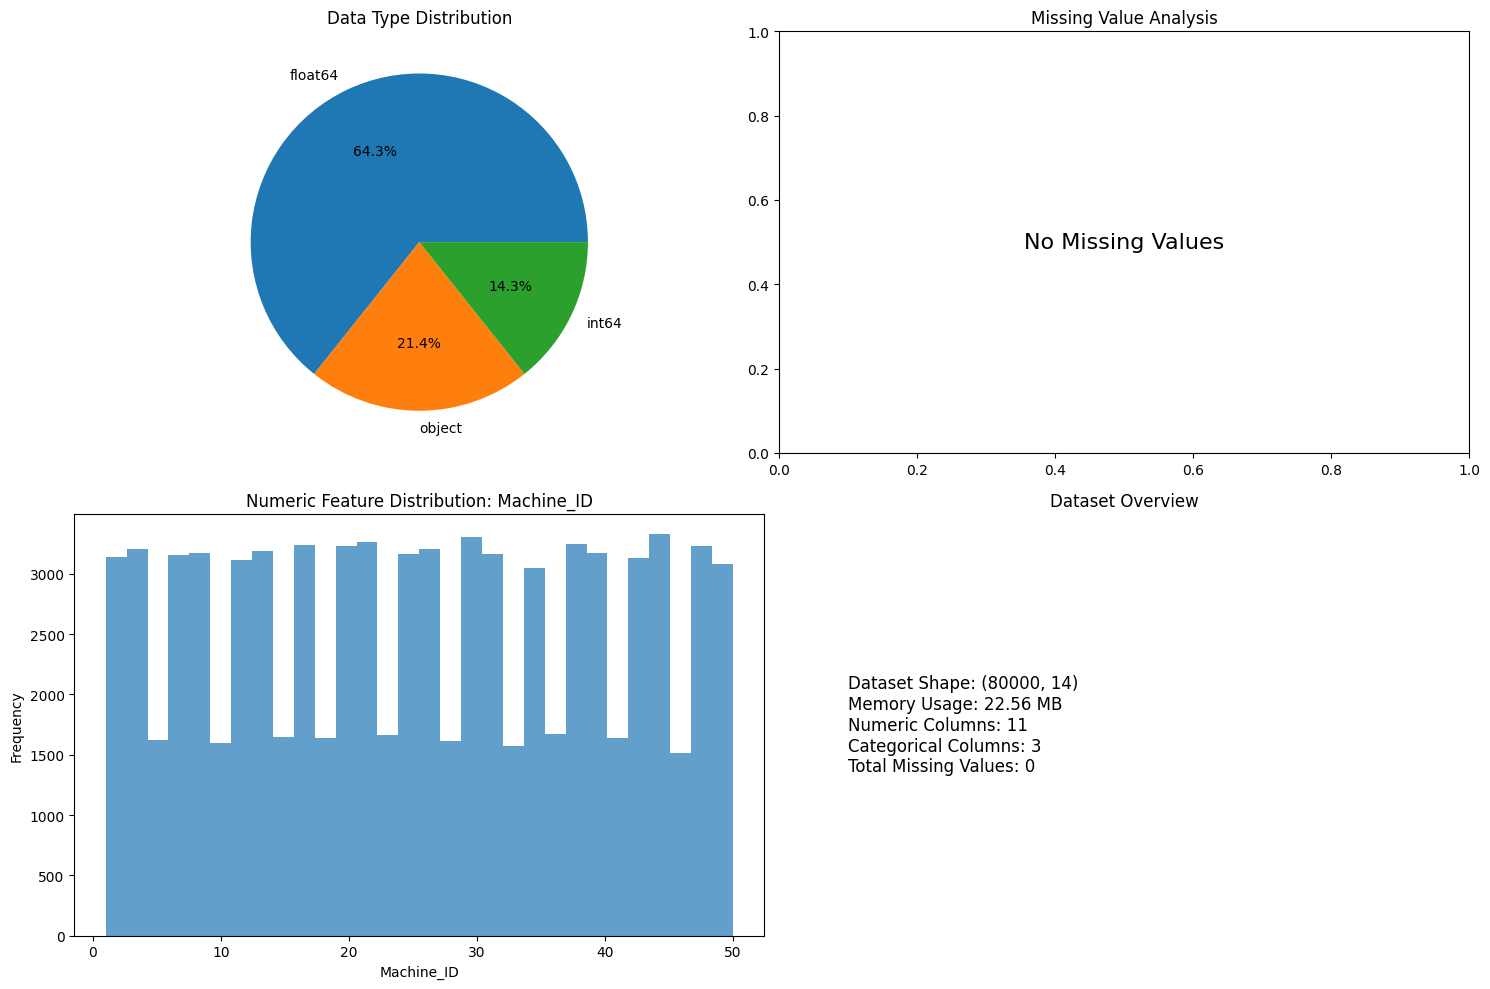

In [5]:
# Visualize missing values
plot_data_overview(train_df)

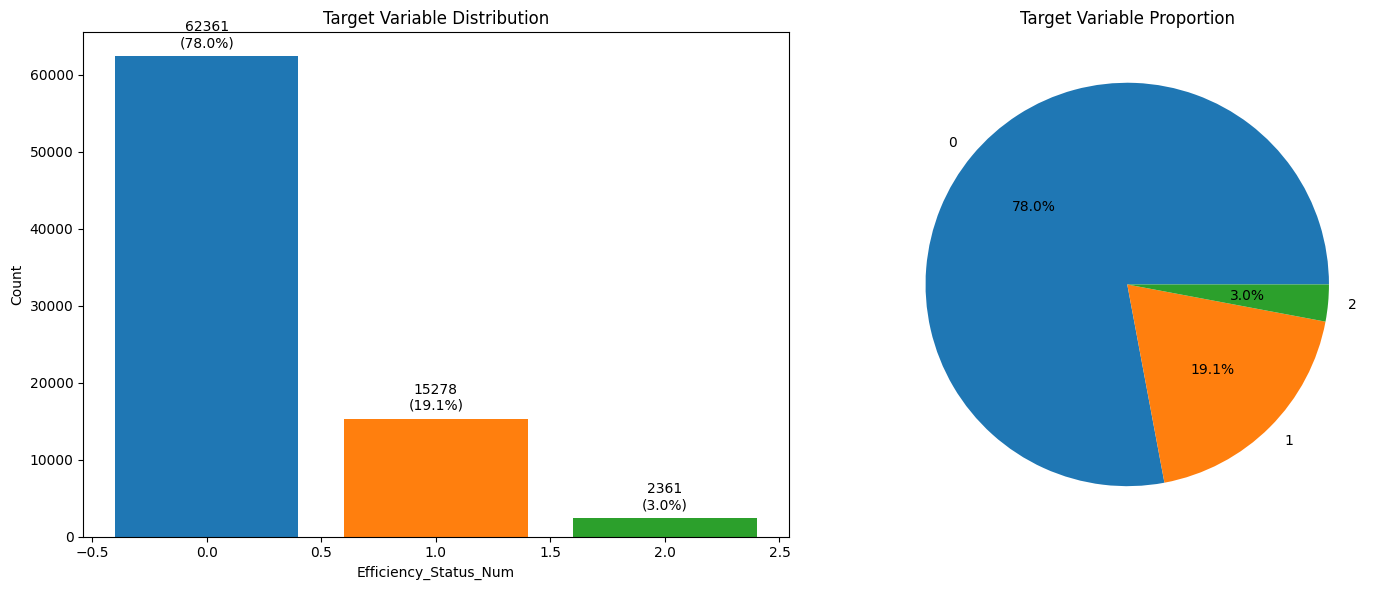

In [6]:
# reduce memory usage
visualizer = DataVisualizer()

# Target variable distribution
visualizer.plot_target_distribution(train_df, 'Efficiency_Status_Num')

## 4. Missing value analysis

In [7]:
# Missing values
plot_missing_values(train_df, threshold=0.1)

No missing values exceed the threshold


In [9]:
train_df.columns

Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status', 'Efficiency_Status_Num'],
      dtype='object')

## 5. Numerical feature analysis

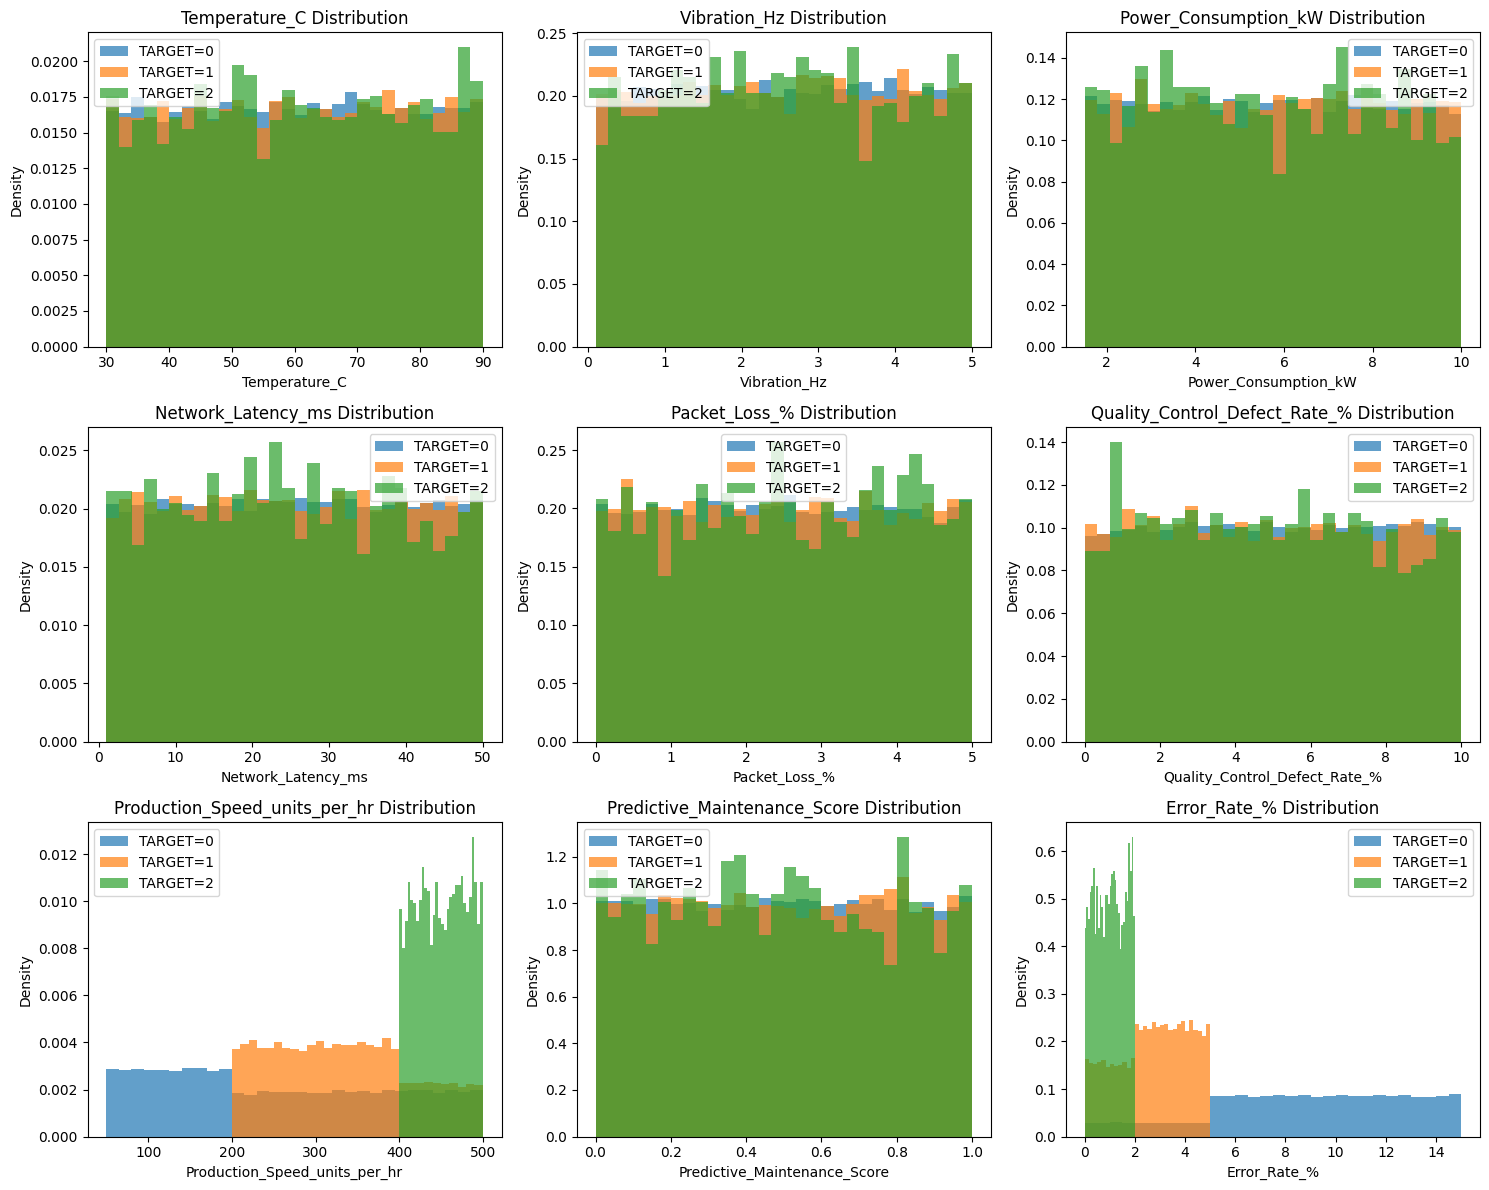

In [10]:
# 5. Numerical feature analysis
important_numeric_features = [
    'Temperature_C',                   # sensor: overheating / cooling issues
    'Vibration_Hz',                    # sensor: mechanical faults
    'Power_Consumption_kW',            # energy anomalies, efficiency drops
    'Network_Latency_ms',              # digital/system communication delay
    'Packet_Loss_%',                   # communication failures
    'Quality_Control_Defect_Rate_%',   # direct measure of product quality
    'Production_Speed_units_per_hr',   # throughput / performance metric
    'Predictive_Maintenance_Score',    # health indicator of the machine
    'Error_Rate_%'                     # operational errors
]


# Numerical feature distributions and their relationship with the target variable
visualizer.plot_numerical_features(train_df, important_numeric_features, 'Efficiency_Status_Num')

## 6.   Numerical feature analysis

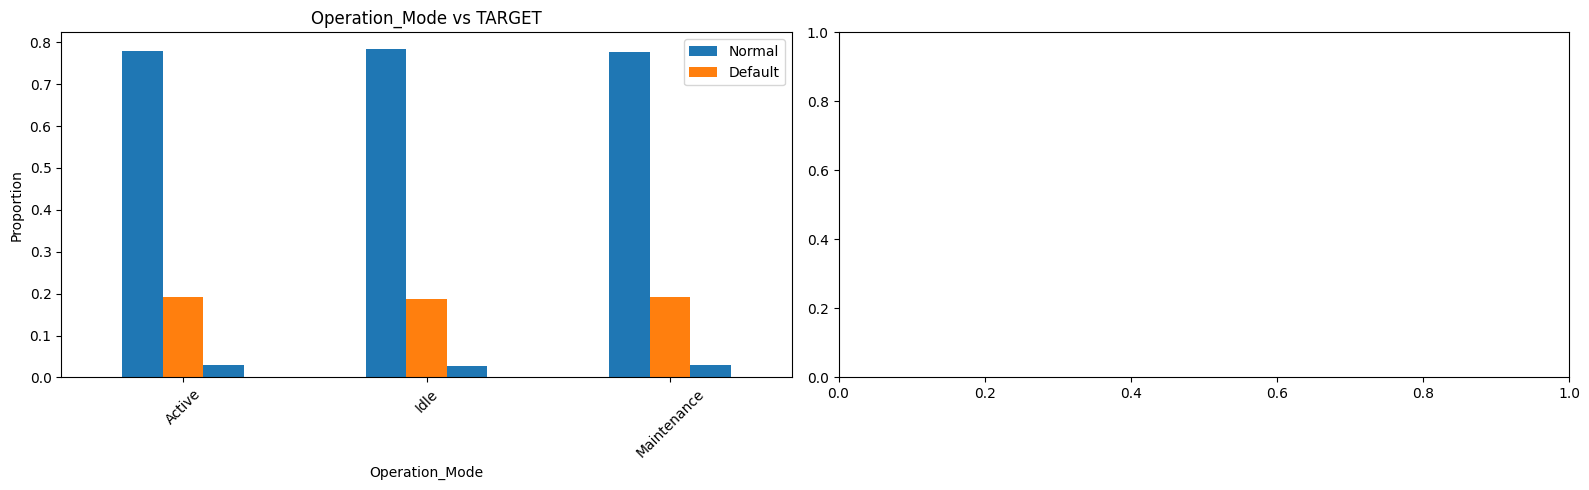

In [17]:
# 6.   Numerical feature analysis
categorical_features = [
    'Operation_Mode']

# Categorical feature distributions and their relationship with the target variable
visualizer.plot_categorical_features(train_df, categorical_features, 'Efficiency_Status_Num')

## 7. Correlation analysis

In [18]:
# Identify all numeric features
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude identifier columns 
numeric_features = [col for col in numeric_features if 'machine_ID' not in col]


# Compute correlations with the target variable
correlations = train_df[numeric_features].corrwith(train_df['Efficiency_Status_Num']).sort_values(ascending=False)

print(" Correlations with target variable:")
print(correlations.head(10))
print("\nLowest correlations with target variable:")
print(correlations.tail(10))

 Correlations with target variable:
Efficiency_Status_Num            1.000000
Production_Speed_units_per_hr    0.332846
Machine_ID                       0.003825
Packet_Loss_%                    0.003546
Temperature_C                    0.002429
Vibration_Hz                     0.000650
Power_Consumption_kW            -0.000970
Predictive_Maintenance_Score    -0.000981
Network_Latency_ms              -0.005219
Quality_Control_Defect_Rate_%   -0.009321
dtype: float64

Lowest correlations with target variable:
Production_Speed_units_per_hr    0.332846
Machine_ID                       0.003825
Packet_Loss_%                    0.003546
Temperature_C                    0.002429
Vibration_Hz                     0.000650
Power_Consumption_kW            -0.000970
Predictive_Maintenance_Score    -0.000981
Network_Latency_ms              -0.005219
Quality_Control_Defect_Rate_%   -0.009321
Error_Rate_%                    -0.602302
dtype: float64


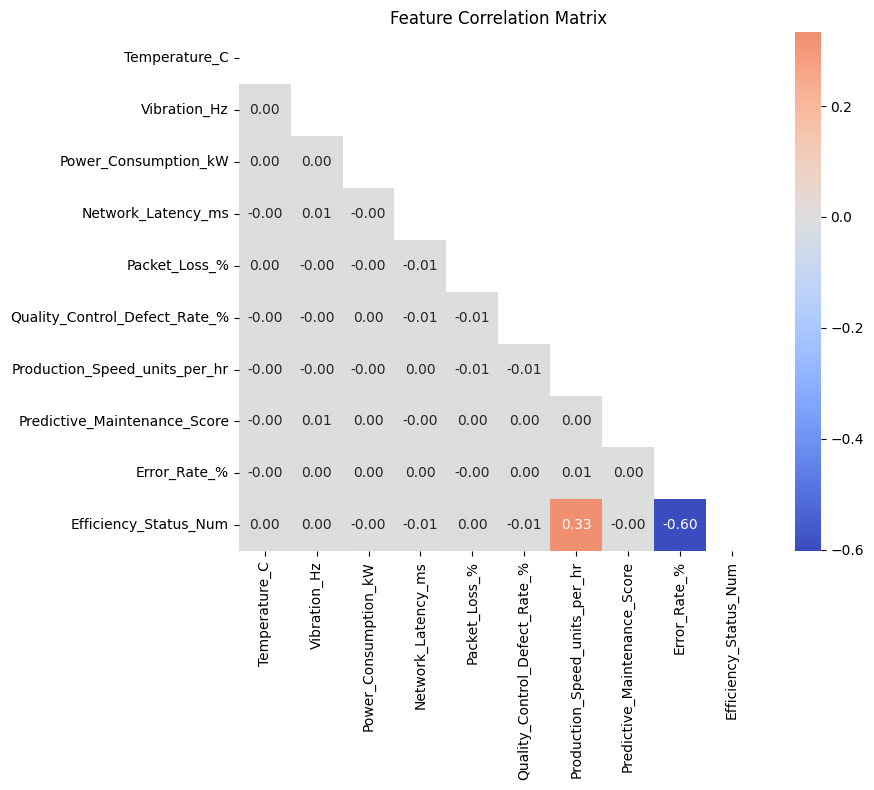

In [19]:
# Correlation matrix for important numeric features
important_features = important_numeric_features + ['Efficiency_Status_Num']
visualizer.plot_correlation_matrix(train_df, important_features)

## 10. Key Findings Summary
Data Characteristics

The training set contains 80,000 rows samples and 12 features

The target variable is imbalanced, with a default rate of about 64%, 21%, 14%.  respectively for the three classes

The dataset does not contain any missing values.

Important Features

Business Insights

- Machine_ID: Unique identifier for each machine.
- Operation_Mode: The mode in which the machine operates (e.g., automatic, manual).
- Efficiency_Status: Categorical variable indicating the efficiency status of the machine (e.g., high, medium, low).    
- Numerical Features: Several numerical features related to machine performance, such as temperature, pressure, and speed.
- Correlation Analysis: Some numerical features show significant correlation with the target variable, indicating their potential importance in predicting machine efficiency.
To sum up: The dataset provides a comprehensive view of machine performance, with various features that can be leveraged for predictive modeling.